#Cifar-10 Image Classifiction
The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

###Problem Definition
Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

##Importing Libraries

In [1]:
import os
import pytz
import numpy as np
import pandas as pd
import datetime
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from datetime import datetime
from tensorflow.keras.preprocessing import image
%load_ext tensorboard

##Loading Data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


##Data Processing

In [4]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

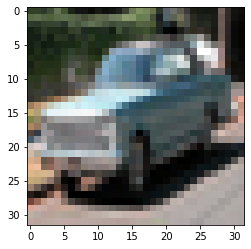

In [8]:
plt.imshow(x_train[32])

##Building Model

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     zoom_range=0.3,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
#     )
# datagen.fit(x_train)

In [9]:
from tensorflow.keras.applications import VGG16

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [14]:
vgg16 = VGG16(include_top=False, input_shape=(32, 32, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [13]:
custom_model = models.Sequential()

In [15]:
custom_model.add(vgg16)
custom_model.add(tf.keras.layers.Flatten())
custom_model.add(tf.keras.layers.Dropout(0.5))
custom_model.add(tf.keras.layers.Dense(256, activation="relu"))
custom_model.add(tf.keras.layers.Dropout(0.2))
custom_model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [16]:
optimizers = tf.keras.optimizers
custom_model.compile(loss='categorical_crossentropy',
optimizer = optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy']
)

In [17]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
No

In [12]:
DateTimeNow = datetime.now(pytz.timezone('Asia/Karachi')).strftime("%Y-%m-%d  %H:%M:%S")
DateTimeNow

'2022-02-20  23:48:15'

In [18]:
path = 'log ' + DateTimeNow

In [ ]:
# tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir = path, histogram_freq=1)

In [19]:
batch_size = 32
history = custom_model.fit(
x_train,
y_train,
validation_split = 0.1, shuffle = True, epochs = 10, batch_size = batch_size) #callbacks=[tensorboard_callbacks])

Epoch 1/10
1407/1407 [==============================] - 101s 64ms/step - loss: 1.2118 - accuracy: 0.5842 - val_loss: 0.8589 - val_accuracy: 0.7270
Epoch 2/10
1407/1407 [==============================] - 89s 63ms/step - loss: 0.6300 - accuracy: 0.8025 - val_loss: 0.5393 - val_accuracy: 0.8210
Epoch 3/10
1407/1407 [==============================] - 91s 64ms/step - loss: 0.4530 - accuracy: 0.8574 - val_loss: 0.5243 - val_accuracy: 0.8352
Epoch 4/10
1407/1407 [==============================] - 88s 62ms/step - loss: 0.3357 - accuracy: 0.8948 - val_loss: 0.4646 - val_accuracy: 0.8466
Epoch 5/10
1407/1407 [==============================] - 89s 63ms/step - loss: 0.2520 - accuracy: 0.9214 - val_loss: 0.4901 - val_accuracy: 0.8480
Epoch 6/10
1407/1407 [==============================] - 88s 62ms/step - loss: 0.1859 - accuracy: 0.9425 - val_loss: 0.5770 - val_accuracy: 0.8456
Epoch 7/10
1407/1407 [==============================] - 88s 62ms/step - loss: 0.1403 - accuracy: 0.9572 - val_loss: 0.5500 

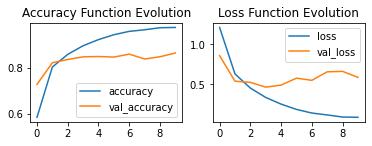

In [20]:
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

In [ ]:
custom_model.save("copy of cifar_10_model.h5")

In [23]:
model = models.load_model("/content/drive/MyDrive/Colab Notebooks/Copy of cifar_10_model/copy of cifar_10_model.h5")

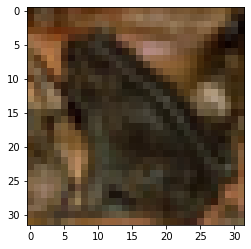

In [37]:
plt.imshow(x_test[30])

In [ ]:
for i in enumerate(classes_name):
  print(i)

(0, 'Airplane')
(1, 'Automobile')
(2, 'Bird')
(3, 'Cat')
(4, 'Deer')
(5, 'Dog')
(6, 'Frog')
(7, 'Horse')
(8, 'Ship')
(9, 'Truck')


In [27]:
np.argmax([5, 3, 9, 8 , 7])

2

In [35]:
pred = np.argmax(custom_model.predict(x_test[30].reshape(1, 32, 32, 3)), axis=1)
pred

array([6])

In [36]:
classes_name[pred[0]]

'Frog'

In [ ]:
y_predict = np.argmax(custom_model.predict(x_test), axis=1)

In [ ]:
Path = '/content/drive/MyDrive/Colab Notebooks/cifar_10_model/test pictures/'

In [ ]:
Image1 = Path+'Deerimagefromgoogle .jpg'
Image2 = Path+'frog10.png'

In [ ]:
Image11 = image.load_img(Image1, target_size = (32,32,3))
Image11 = image.img_to_array(Image11).reshape(32,32, 3)
Image21 = image.load_img(Image2, target_size = (32,32,3))
Image21 = image.img_to_array(Image21).reshape(32,32, 3)

In [ ]:
Array = np.array([Image11, Image21])

In [ ]:
np.argmax(custom_model.predict(Array), axis=1)

array([4, 6])